In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import IsolationForest
from matplotlib import cm

In [ ]:
all_data=pd.read_csv('/content/drive/My Drive/Thesis_PUBG/Kill_Walk.csv')
print(all_data.shape)
all_data.head()

(87898, 3)


,tracker_id,solo_Kills,solo_WalkDistance
0,4405,0.007955,0.011768
1,8199,0.021515,0.019476
2,4454,0.003254,0.002580
3,7729,0.010125,0.007152
4,0,0.007594,0.006809


In [ ]:
train=all_data.iloc[:10000,1:3]
print(train.shape)
train.head()

(10000, 2)


,solo_Kills,solo_WalkDistance
0,0.007955,0.011768
1,0.021515,0.019476
2,0.003254,0.002580
3,0.010125,0.007152
4,0.007594,0.006809


In [ ]:
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.01) 
clf.fit(train)
if_scores = clf.decision_function(train)
if_anomalies=clf.predict(train)
labels=if_anomalies
print(labels)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=train[if_anomalies==1];

[ 1  1  1 ...  1  1 -1]


Text(0.5, 1.0, 'Isolation Forests')

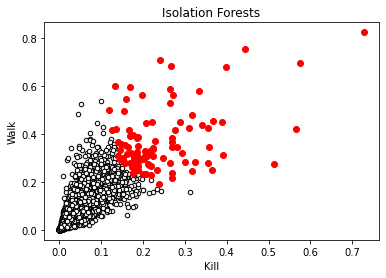

In [ ]:
cmap=np.array(['white','red'])
plt.scatter(train.iloc[:,0],train.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('Kill')
plt.ylabel('Walk')
plt.title('Isolation Forests')

In [ ]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score: {silhouette_score(train, labels)}')

Silhouette Score: 0.8038415223814102
